# Lending Club Case Study

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# hide the warnings
import warnings
warnings.filterwarnings('ignore')

### Read CSV file

In [3]:
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

__shape__ attribute of __pandas.DataFrame__ stores the __number__ of __rows__ and __columns__ as a __tuple__ (number of rows, number of columns)

In [4]:
loan.shape

(39717, 111)

In [5]:
#check if any null values present in each column in dataframe
loan.isnull().any()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                          True
emp_length                         True
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                               True
purpose                           False
title                              True
zip_code                          False
addr_state                        False
dti                               False


In [6]:
#calulcate the percentage of null values
round(100*(loan.isnull().sum()/len(loan.id)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

__Observation:__ As we see there are so many __columns__ which has __100% null values or missing values__. Lets __remove all__ the __columns__ which has more than __30% missing value.__

In [7]:
colnames = (loan.isnull().sum()/len(loan))
colnames = list(colnames[colnames.values>=.30].index)
loan.drop(labels = colnames,axis =1,inplace=True)        
print("Number of Columns dropped ",len(colnames))

Number of Columns dropped  58


Lets create a __function__ to __describe__ the each __column_ in deep way.

In [8]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count','Missing','NUnique','Unique','Dtype', 'Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std', 'Skew', 'Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                                  df[col].max(), df[col].std(),df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],'','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew', 'NUnique'], ascending=False)

In [9]:
unistats(loan)

,Count,Missing,NUnique,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
annual_inc,39717,0,5318,"[24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ...",float64,True,60000,68968.9,4000,40404,59000,82300,6e+06,63793.8,30.9492,2302.74
collection_recovery_fee,39717,0,2616,"[0.0, 1.11, 2.09, 2.52, 4.16, 6.3145, 2.57, 2....",float64,True,0,12.4061,0,0,0,0,7002.19,148.672,25.0294,821.301
recoveries,39717,0,4040,"[0.0, 117.08, 189.06, 269.29, 444.3, 645.1, 26...",float64,True,0,95.2216,0,0,0,0,29623.3,688.745,16.5194,379.378
out_prncp_inv,39717,0,1138,"[0.0, 524.06, 1844.43, 2177.03, 2632.59, 3120....",float64,True,0,50.9898,0,0,0,0,6307.37,373.824,9.24377,98.0406
out_prncp,39717,0,1137,"[0.0, 524.06, 1849.1, 2181.42, 2637.34, 3125.7...",float64,True,0,51.2279,0,0,0,0,6311.47,375.173,9.22673,97.6586
total_rec_late_fee,39717,0,1356,"[0.0, 16.97, 15.00000003, 24.17, 15.0, 1.0, 23...",float64,True,0,1.36302,0,0,0,0,180.2,7.28998,8.42954,100.852
delinq_2yrs,39717,0,11,"[0, 2, 3, 1, 4, 6, 5, 8, 7, 9, 11]",int64,True,0,0.146512,0,0,0,0,11,0.491812,5.02204,39.4125
pub_rec_bankruptcies,39020,697,3,"[0.0, 1.0, 2.0, nan]",float64,True,0,0.0432599,0,0,0,0,2,0.204324,4.55328,19.1383
pub_rec,39717,0,5,"[0, 1, 2, 3, 4]",int64,True,0,0.0550646,0,0,0,0,4,0.2372,4.53805,23.8894
revol_bal,39717,0,21711,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ...",int64,True,0,13382.5,0,3703,8850,17058,149588,15885,3.19088,14.8965


As we see in the __above dataframe__ some __columns__ has __Number__ of __unique__ value is __1__.So we __don't__ __need__ these __columns__ in our __analysis__. Lets __remove__ it.

In [10]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [11]:
loan.drop((unique.index), axis =1, inplace=True)

In [12]:
loan.shape

(39717, 44)

Also __removed unnecessary columns__ in the __dataframe__.

In [13]:
loan.drop(['id','url','zip_code','out_prncp','out_prncp_inv','title'],axis =1, inplace=True)

In [14]:
loan.shape

(39717, 38)

In [15]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

# Univariate Analysis

Let visualize the counts of the target variable.

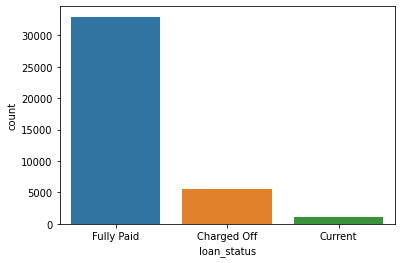

In [16]:
sns.countplot(x='loan_status', data=loan);

We need to __find__ the __clue or observations__ between __loans__ that have been __fully paid__ or __charged off__. Let's __not consider loans__ that are __current__.

In [17]:
loan = loan[loan.loan_status.isin(['Fully Paid','Charged Off'])]

Lets create a function for univariate plot.

In [18]:
def univaritePlot(df,col,vartype):
    if vartype==0:
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
        plt.show()
    if vartype==1:
        fig, ax = plt.subplots()
        fig.set_size_inches(len(df[col].unique())+10 , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index) 
        #ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))

## Continuous Variables

__Varibale Name__: __loan_amnt__: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

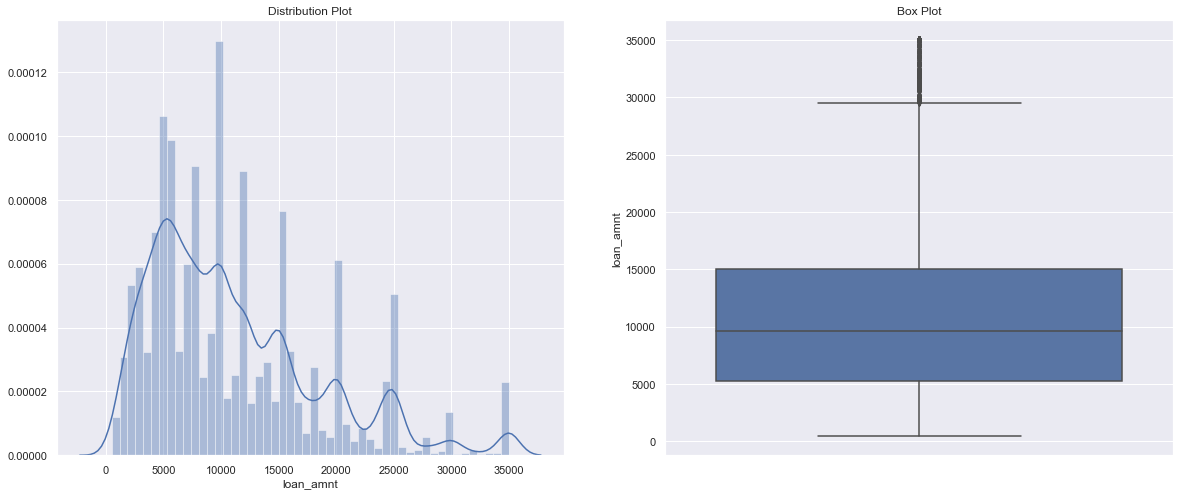

In [19]:
univaritePlot(df=loan,col='loan_amnt',vartype=0)

__Observation__:Most of the loan amounts are distributed between 5000 to 15000 USD.

__Varibale Name__: __funded_amnt_inv__: The total amount committed by investors for that loan at that point in time.

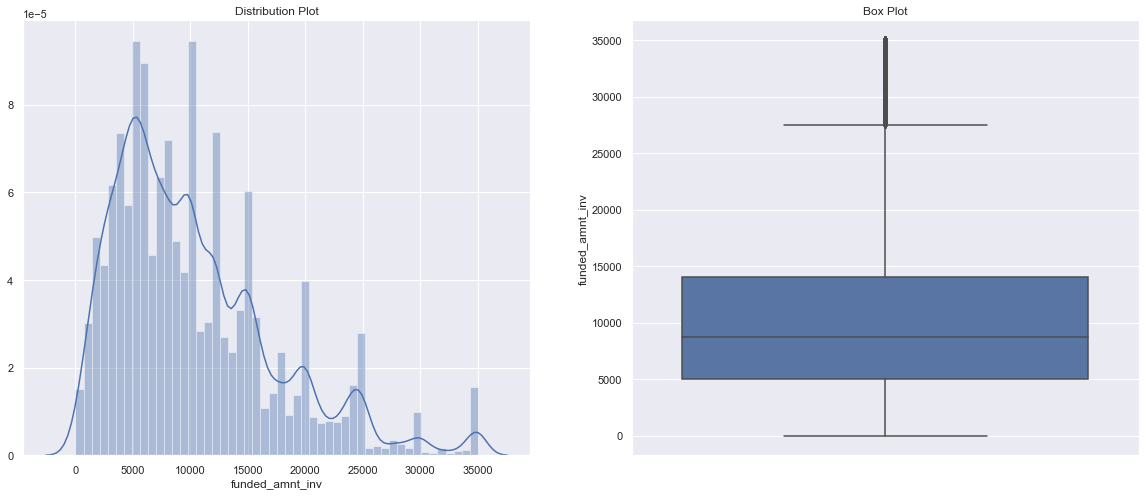

In [20]:
univaritePlot(df=loan,col='funded_amnt_inv',vartype=0)

__Observation__:Most of the funded amounts by the investors are distributed between 5000 to 14000 USD.

__Varibale Name__: __annual_inc__:The self-reported annual income provided by the borrower during registration.

As we see in the __above dataframe__ for __each column__. In the __annual_inc__ column there is an __outlier__. So first we need to __remove__ the __outlier__ to visualize it.

In [21]:
loan["annual_inc"].quantile([0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

0.05      24000.00
0.10      30000.00
0.15      34000.00
0.20      37196.16
0.25      40000.00
0.30      44500.00
0.40      50004.00
0.50      58868.00
0.60      65004.00
0.70      75000.00
0.80      90000.00
0.90     115000.00
0.95     140004.00
1.00    6000000.00
Name: annual_inc, dtype: float64

As we see __0.95 quantile__ is best to remove the __outlier__.

In [22]:
q = loan["annual_inc"].quantile(0.95)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

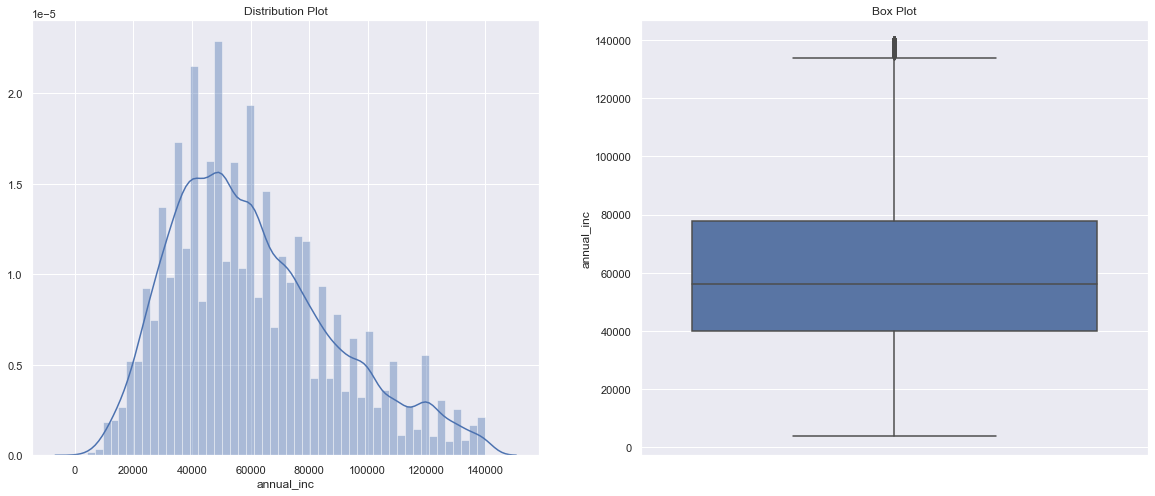

In [23]:
univaritePlot(df=loan,col='annual_inc',vartype=0)

__Observation__:Most of the applicants annual income between 40000 to 80000 USD annually.

__Varibale Name__: __int_rate__ Interest Rate on the loan

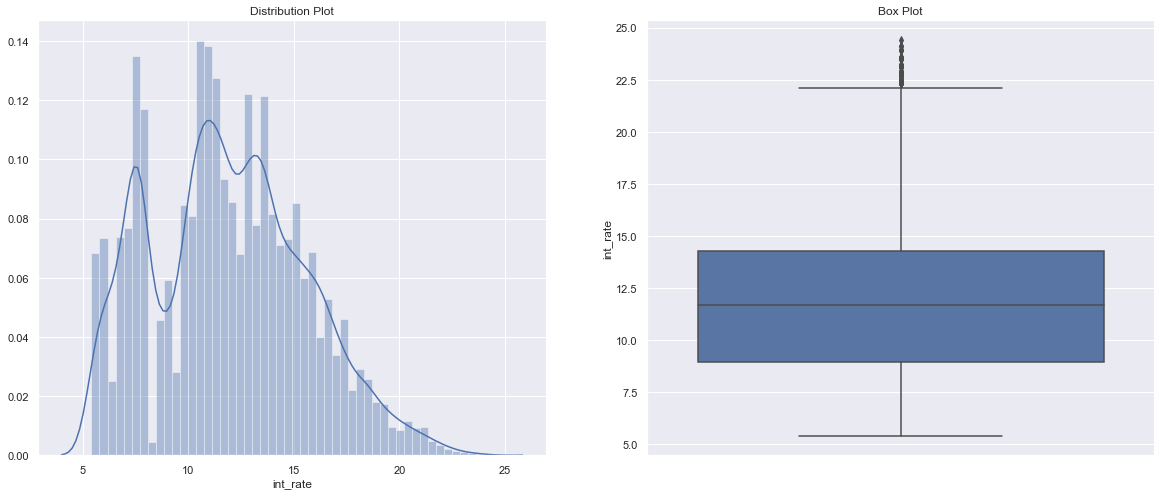

In [24]:
univaritePlot(df=loan,col='int_rate',vartype=0)

__Observation__:Most of the loans interest rates are distributed between 9% to 14%.

## Categorical Variables

__Varibale Name__: __purpose__ :A category provided by the borrower for the loan request. 

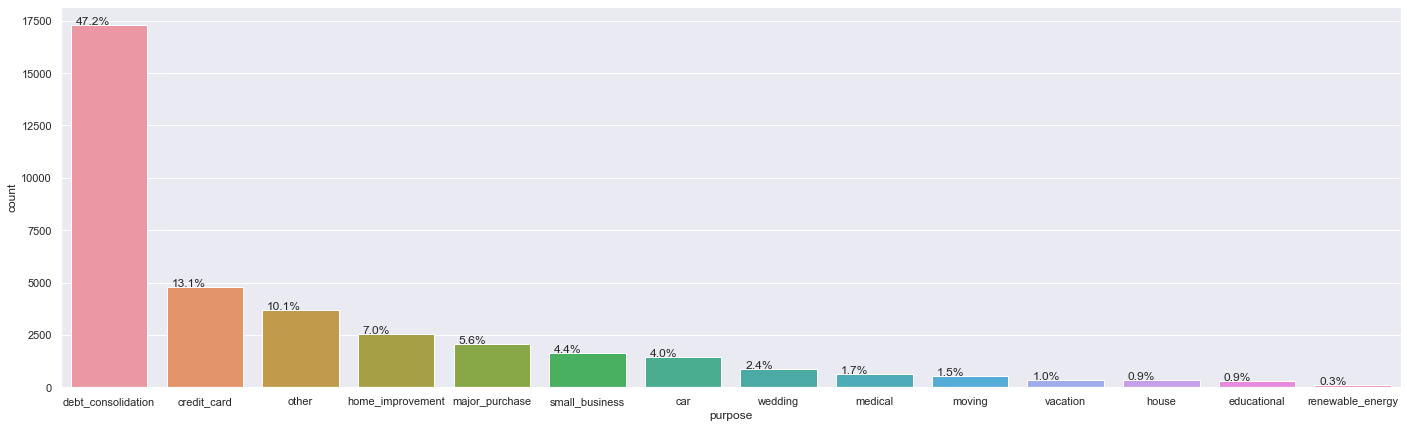

In [25]:
univaritePlot(df=loan,col='purpose',vartype=1)

__Observation__: Approx 47%, the purpose of the loan is debt_consolidation.

__Varibale Name__: __home_ownership__ : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

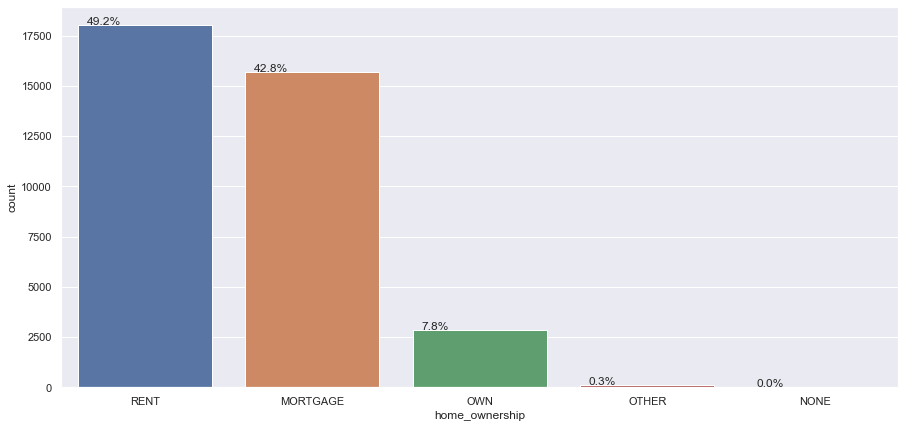

In [26]:
univaritePlot(df=loan,col='home_ownership',vartype=1)

__Observation__:50% of applicants are living in rented home whereas 41% applicants were mortgaged their home.

__Varibale Name__: __term__: The number of payments on the loan. Values are in months and can be either 36 or 60.

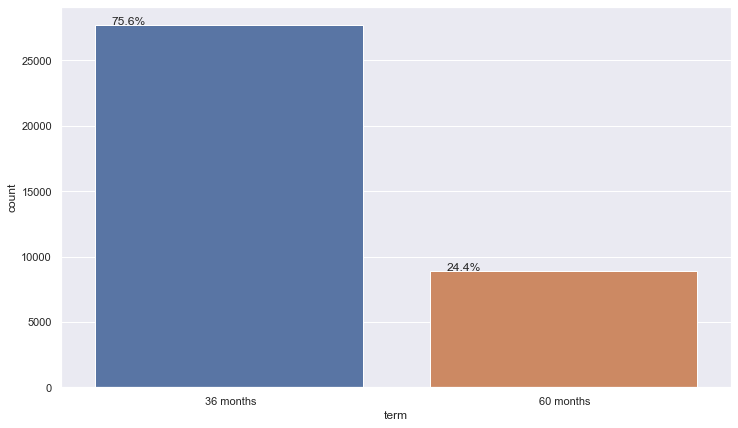

In [27]:
univaritePlot(df=loan,col='term',vartype=1)

__Observation__: 76% loans for 36 months while 24% loans for 60 months

__Varibale Name__: __grade__: LC assigned loan grade

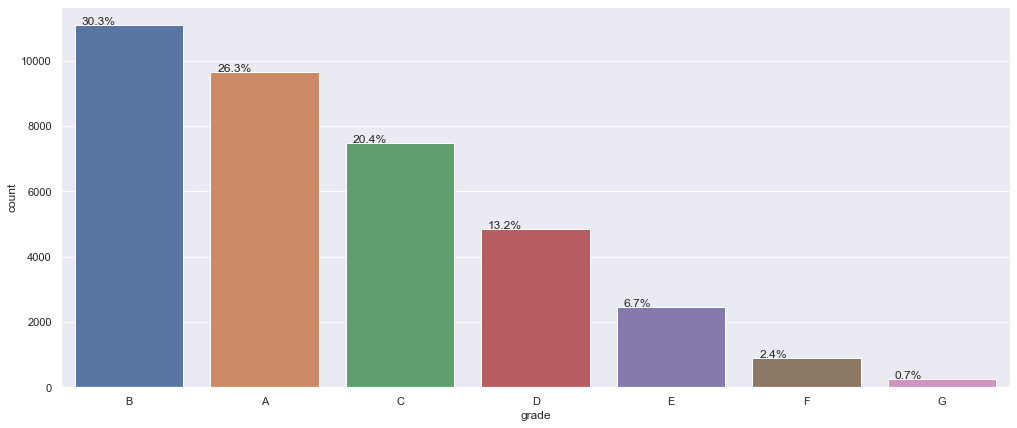

In [28]:
univaritePlot(df=loan,col='grade',vartype=1)

__Observation__: Most of the loans have B and A grade and G grade have least loans.

## Bivariate/Multivariate Analysis

Lets create a function to calculating the percentage of Charged OFF.

In [29]:
def crosstab_df(df,col):
    df_temp = pd.crosstab(df[col], df['loan_status'],margins=True,margins_name="Total")
    df_temp['Percentage of Charged Off'] = round(100*(df_temp['Charged Off']/df_temp['Total']),2)
    df_temp['Percentage of Fully Paid'] = round(100*(df_temp['Fully Paid']/df_temp['Total']),2)
    #df_temp = df_temp[:-1]
    return df_temp[:-1]

Create a Function to visualise the bivariate analysis

In [30]:
def bivariatePlot(df,types,col=None):
    if types==1:
        linePlot = df[['Percentage of Charged Off']]      
        barPlot =  df[['Percentage of Charged Off','Percentage of Fully Paid']]
        ax = barPlot.plot(figsize=(15,10),kind='bar',stacked=True)
        ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
        plt.show()
    if types==0:
        fig_dims = (6, 4)
        fig, ax = plt.subplots(figsize=fig_dims)
        ax=sns.barplot(x=col,y="Percentage of Charged Off",ax=ax,data=df)
        plt.xticks(rotation=90)
        plt.tight_layout()

### term vs loan status

In [31]:
term = crosstab_df(loan,'term')
term

loan_status,Charged Off,Fully Paid,Total,Percentage of Charged Off,Percentage of Fully Paid
term,,,,,
36 months,3113,24601,27714,11.23,88.77
60 months,2303,6625,8928,25.80,74.20


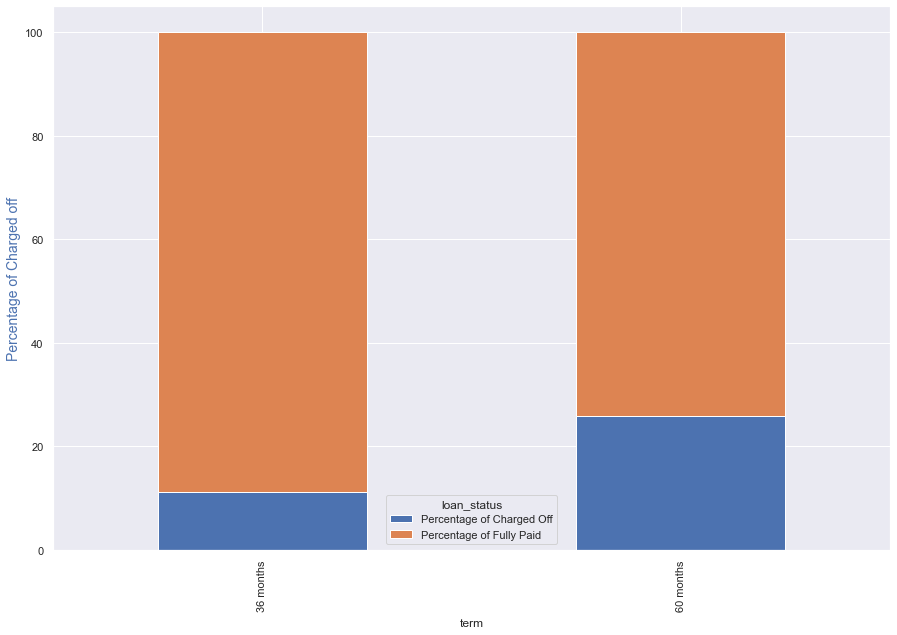

In [32]:
bivariatePlot(df=term,types=1)

__Inference__: __defaulters increase__ to __25%__ from __11%__ with __term__ __increase__ in __terms__ from __36 to 60 months__

## grade vs loan status

In [33]:
grade = crosstab_df(loan,'grade')
grade

loan_status,Charged Off,Fully Paid,Total,Percentage of Charged Off,Percentage of Fully Paid
grade,,,,,
A,593,9050,9643,6.15,93.85
B,1376,9720,11096,12.40,87.60
C,1324,6153,7477,17.71,82.29
D,1080,3754,4834,22.34,77.66
E,659,1786,2445,26.95,73.05
F,289,597,886,32.62,67.38
G,95,166,261,36.40,63.60


In [34]:
grade['grade']=grade.index
grade.reset_index(drop=True, inplace=True)

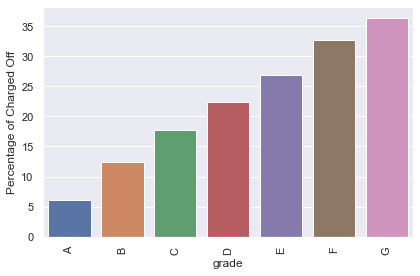

In [35]:
bivariatePlot(df=grade,col='grade',types=0)

__inference__: At a __grade level- Highest__ __defaults in grade=G__, followed by f and E. __F and G has nearly 1/3rd default percentage__.

## Emp length vs loan status

In [36]:
emp_length = crosstab_df(loan,'emp_length')
emp_length

loan_status,Charged Off,Fully Paid,Total,Percentage of Charged Off,Percentage of Fully Paid
emp_length,,,,,
1 year,449,2594,3043,14.76,85.24
10+ years,1269,6615,7884,16.10,83.90
2 years,547,3554,4101,13.34,86.66
3 years,536,3287,3823,14.02,85.98
4 years,443,2754,3197,13.86,86.14
5 years,441,2603,3044,14.49,85.51
6 years,294,1779,2073,14.18,85.82
7 years,252,1391,1643,15.34,84.66
8 years,194,1147,1341,14.47,85.53


In [37]:
emp_length['emp_length']=emp_length.index
emp_length.reset_index(drop=True, inplace=True)

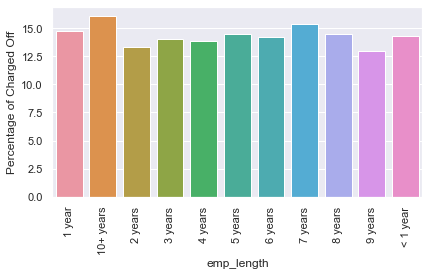

In [38]:
bivariatePlot(df=emp_length,col='emp_length',types=0)

__Observation__:No significant difference in default% can be seen with respect to employment length

## home ownership vs loan status

In [39]:
home_ownership = crosstab_df(loan,'home_ownership')
home_ownership

loan_status,Charged Off,Fully Paid,Total,Percentage of Charged Off,Percentage of Fully Paid
home_ownership,,,,,
MORTGAGE,2192,13474,15666,13.99,86.01
NONE,0,3,3,0.00,100.00
OTHER,17,75,92,18.48,81.52
OWN,434,2418,2852,15.22,84.78
RENT,2773,15256,18029,15.38,84.62


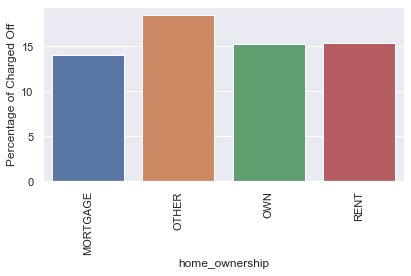

In [40]:
home_ownership['home_ownership']=home_ownership.index
home_ownership.reset_index(drop=True, inplace=True)
home_ownership = home_ownership[home_ownership.home_ownership.isin(['MORTGAGE','OTHER','OWN','RENT'])]
bivariatePlot(df=home_ownership,col='home_ownership',types=0)

__inference__: Applicants with the home_ownership=='MORTGAGE' have taken 44% of the loans with the least default percentage(14%). Applicants with home_ownership=='OTHER' have the highest default percentage (18.4%)

## purpose vs loan status

In [41]:
purpose = crosstab_df(loan,'purpose')
purpose

loan_status,Charged Off,Fully Paid,Total,Percentage of Charged Off,Percentage of Fully Paid
purpose,,,,,
car,159,1289,1448,10.98,89.02
credit_card,519,4263,4782,10.85,89.15
debt_consolidation,2675,14626,17301,15.46,84.54
educational,54,258,312,17.31,82.69
home_improvement,322,2233,2555,12.60,87.40
house,55,283,338,16.27,83.73
major_purchase,217,1828,2045,10.61,89.39
medical,104,536,640,16.25,83.75
moving,90,460,550,16.36,83.64


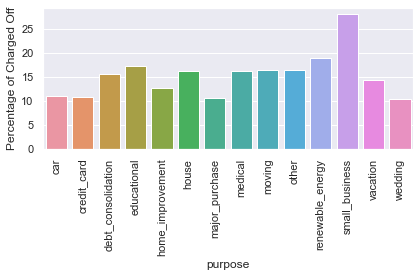

In [42]:
purpose['purpose']=purpose.index
purpose.reset_index(drop=True, inplace=True)
bivariatePlot(df=purpose,col='purpose',types=0)

__Inference__: Small Business has the highest default percentage(27%).Majority of the loans (47%) are applied to fulfill the purpose of debt_consolidation

## int rate vs loan status

Create bins for int_rate with using cut function in pandas

   Fully_Paid  Charged_Off  total  %Charged_Off int_rate_bins
0        7469          434   7903        0.0549           5-7
1        6916          818   7734        0.1058          8-10
2        9301         1728  11029        0.1567         11-13
3        5324         1416   6740        0.2101         14-16
4        1811          752   2563        0.2934         17-19
5         386          255    641        0.3978         20-22
6          19           13     32        0.4062         23-25


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

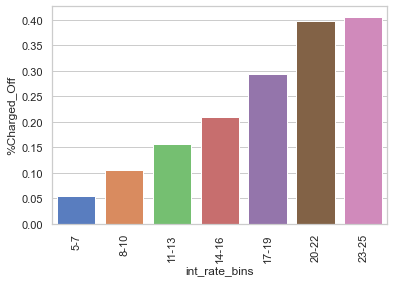

In [43]:
#int_rate ~ loan_status

bins=[5,8,11,14,17,20,23,25]
bin_label=['5-7','8-10','11-13','14-16','17-19','20-22','23-25']
df_working=loan
df_working['int_rate_val_bins']=pd.cut(df_working['int_rate'],bins=bins,labels=bin_label)

df_working['int_rate_val_bins'].value_counts()
df_int_rate_bins_default=pd.DataFrame()
df_groupby=df_working[df_working['loan_status']=='Fully Paid'].groupby('int_rate_val_bins')
df_int_rate_bins_default['Fully_Paid']=df_groupby.count()['member_id']

df_groupby=df_working[df_working['loan_status']=='Charged Off'].groupby('int_rate_val_bins')
df_int_rate_bins_default['Charged_Off']=df_groupby.count()['member_id']

df_int_rate_bins_default['total']=df_int_rate_bins_default['Charged_Off']+df_int_rate_bins_default['Fully_Paid']
df_int_rate_bins_default['%Charged_Off']=round(df_int_rate_bins_default['Charged_Off']/df_int_rate_bins_default['total'],4)
df_int_rate_bins_default['int_rate_bins']=df_int_rate_bins_default.index
df_int_rate_bins_default.reset_index(drop=True, inplace=True)
print(df_int_rate_bins_default)
sns.set_style("whitegrid")
bar_plot=sns.barplot(x='int_rate_bins',y='%Charged_Off',data=df_int_rate_bins_default,palette='muted') 
plt.xticks(rotation=90)

__Inferences__:
higher the rate of interest, higher is the default%.
Most of the loans are charged an interest between 11% and 13%.
loans with interest rate between 5-7% have the least default percentage (5%).
Loans with interest rate between 5-10% have the default percentage below the average default percentage of the dataset (14%)
This means granting loans with interest rates below 10% will lower the overall default rate going forward.

## Derived Metrics

## Installemnt vs loan status

   Fully_Paid  Charged_Off  total  %Charged_Off   installment_bins
0        3455          618   4073        0.1517    (15.68, 101.67]
1        3523          547   4070        0.1344   (101.67, 154.75]
2        3535          536   4071        0.1317   (154.75, 194.37]
3        3506          565   4071        0.1388   (194.37, 244.18]
4        3482          591   4073        0.1451   (244.18, 301.66]
5        3516          554   4070        0.1361   (301.66, 353.11]
6        3446          629   4075        0.1544   (353.11, 437.93]
7        3403          664   4067        0.1633   (437.93, 565.31]
8        3360          712   4072        0.1749  (565.31, 1305.19]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

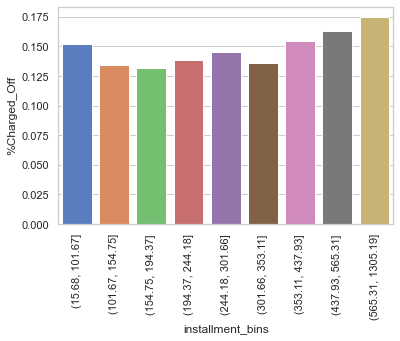

In [44]:
#Installment ~ loan status

df_working['installment'].describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])
df_working['installment_bin']=pd.qcut(df_working['installment'],q=9,precision=2)
# df_working['installment_bin'].head(5)
df_working['installment_bin'].value_counts()

df_instal_bins_default=pd.DataFrame()
df_groupby=df_working[df_working['loan_status']=='Fully Paid'].groupby('installment_bin')
df_instal_bins_default['Fully_Paid']=df_groupby.count()['member_id']

df_groupby=df_working[df_working['loan_status']=='Charged Off'].groupby('installment_bin')
df_instal_bins_default['Charged_Off']=df_groupby.count()['member_id']

df_instal_bins_default['total']=df_instal_bins_default['Charged_Off']+df_instal_bins_default['Fully_Paid']
df_instal_bins_default['%Charged_Off']=round(df_instal_bins_default['Charged_Off']/df_instal_bins_default['total'],4)
df_instal_bins_default['installment_bins']=df_instal_bins_default.index
df_instal_bins_default.reset_index(drop=True, inplace=True)

print(df_instal_bins_default)

sns.set_style("whitegrid")
bar_plot=sns.barplot(x='installment_bins',y='%Charged_Off',data=df_instal_bins_default,palette='muted') 
plt.xticks(rotation=90)

__inference__:
Installment value above 596 have a high default percentage (16.8%)

## loan_amnt vs loan status

   Fully_Paid  Charged_Off  total  %Charged_Off       loan_amnt_bin
0        3242          542   3784        0.1432    (499.99, 3000.0]
1        3074          472   3546        0.1331    (3000.0, 4950.0]
2        4140          612   4752        0.1288    (4950.0, 6000.0]
3        2594          360   2954        0.1219    (6000.0, 7500.0]
4        2878          471   3349        0.1406    (7500.0, 9250.0]
5        3130          483   3613        0.1337   (9250.0, 10500.0]
6        3398          526   3924        0.1340  (10500.0, 13000.0]
7        3469          654   4123        0.1586  (13000.0, 16000.0]
8        2536          534   3070        0.1739  (16000.0, 20000.0]
9        2765          762   3527        0.2160  (20000.0, 35000.0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

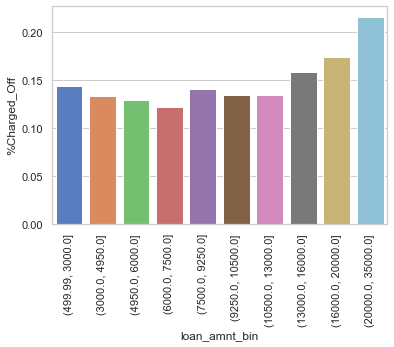

In [45]:
#loan _amnt ~ loan status

df_working['loan_amnt'].describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])
df_working['loan_amnt_bin']=pd.qcut(df_working['loan_amnt'],q=10,precision=2)
# df_working['installment_bin'].head(5)
df_working['loan_amnt_bin'].value_counts()

df_loan_amt_bin_default=pd.DataFrame()
df_groupby=df_working[df_working['loan_status']=='Fully Paid'].groupby('loan_amnt_bin')
df_loan_amt_bin_default['Fully_Paid']=df_groupby.count()['member_id']

df_groupby=df_working[df_working['loan_status']=='Charged Off'].groupby('loan_amnt_bin')
df_loan_amt_bin_default['Charged_Off']=df_groupby.count()['member_id']

df_loan_amt_bin_default['total']=df_loan_amt_bin_default['Charged_Off']+df_loan_amt_bin_default['Fully_Paid']
df_loan_amt_bin_default['%Charged_Off']=round(df_loan_amt_bin_default['Charged_Off']/df_loan_amt_bin_default['total'],4)
df_loan_amt_bin_default['loan_amnt_bin']=df_loan_amt_bin_default.index
df_loan_amt_bin_default.reset_index(drop=True, inplace=True)

print(df_loan_amt_bin_default)
sns.set_style("whitegrid")
bar_plot=sns.barplot(x='loan_amnt_bin',y='%Charged_Off',data=df_loan_amt_bin_default,palette='muted') 
plt.xticks(rotation=90)

__inference__:
Installment value above 21600 have a high default percentage (20.28%)
.Loan_amnt greater than 14000 have a default rate higher than the overall default rate of 14%

## funded_amnt vs loan status

   Fully_Paid  Charged_Off  total  %Charged_Off     funded_amnt_bin
0        3263          546   3809        0.1433    (499.99, 3000.0]
1        3064          475   3539        0.1342    (3000.0, 4800.0]
2        4237          629   4866        0.1293    (4800.0, 6000.0]
3        2159          293   2452        0.1195    (6000.0, 7250.0]
4        3291          530   3821        0.1387    (7250.0, 9000.0]
5        3048          468   3516        0.1331   (9000.0, 10000.0]
6        3140          506   3646        0.1388  (10000.0, 12467.5]
7        3296          558   3854        0.1448  (12467.5, 15000.0]
8        3268          741   4009        0.1848  (15000.0, 20000.0]
9        2460          670   3130        0.2141  (20000.0, 35000.0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

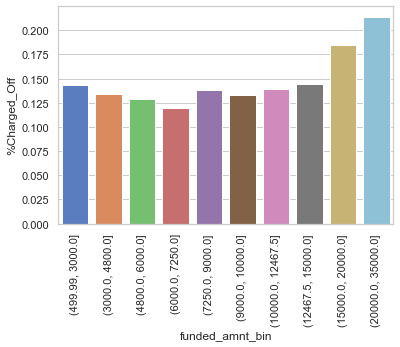

In [46]:
#funded _amnt ~ loan status

df_working['funded_amnt'].describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])
df_working['funded_amnt_bin']=pd.qcut(df_working['funded_amnt'],q=10,precision=2)
# df_working['installment_bin'].head(5)
df_working['loan_amnt_bin'].value_counts()

df_instal_bins_default=pd.DataFrame()
df_groupby=df_working[df_working['loan_status']=='Fully Paid'].groupby('funded_amnt_bin')
df_instal_bins_default['Fully_Paid']=df_groupby.count()['member_id']

df_groupby=df_working[df_working['loan_status']=='Charged Off'].groupby('funded_amnt_bin')
df_instal_bins_default['Charged_Off']=df_groupby.count()['member_id']

df_instal_bins_default['total']=df_instal_bins_default['Charged_Off']+df_instal_bins_default['Fully_Paid']
df_instal_bins_default['%Charged_Off']=round(df_instal_bins_default['Charged_Off']/df_instal_bins_default['total'],4)
df_instal_bins_default['funded_amnt_bin']=df_instal_bins_default.index
df_instal_bins_default.reset_index(drop=True, inplace=True)

print(df_instal_bins_default)
sns.set_style("whitegrid")
bar_plot=sns.barplot(x='funded_amnt_bin',y='%Charged_Off',data=df_instal_bins_default,palette='muted') 
plt.xticks(rotation=90)

__inference__:
Installment value above 21600 have a high default percentage (20.28%)
Loan_amnt greater than 14000 have a default rate higher than the overall default rate of 14%

## Annual inc vs loan status

   Fully_Paid  Charged_Off  total  %Charged_Off      annual_inc_bin
0        3263          546   3809        0.1433    (499.99, 3000.0]
1        3064          475   3539        0.1342    (3000.0, 4800.0]
2        4237          629   4866        0.1293    (4800.0, 6000.0]
3        2159          293   2452        0.1195    (6000.0, 7250.0]
4        3291          530   3821        0.1387    (7250.0, 9000.0]
5        3048          468   3516        0.1331   (9000.0, 10000.0]
6        3140          506   3646        0.1388  (10000.0, 12467.5]
7        3296          558   3854        0.1448  (12467.5, 15000.0]
8        3268          741   4009        0.1848  (15000.0, 20000.0]
9        2460          670   3130        0.2141  (20000.0, 35000.0]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

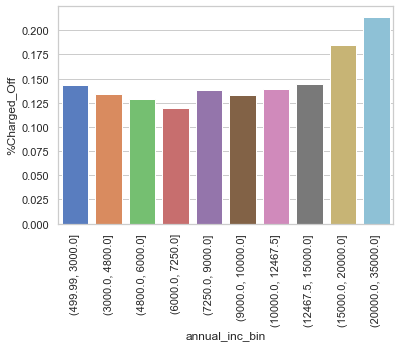

In [50]:
#annual_inc ~ loan status

df_working['annual_inc'].describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])
df_working['annual_inc_bin']=pd.qcut(df_working['funded_amnt'],q=10,precision=2)
# df_working['installment_bin'].head(5)
df_working['annual_inc_bin'].value_counts()

df_annual_inc_default=pd.DataFrame()
df_groupby=df_working[df_working['loan_status']=='Fully Paid'].groupby('annual_inc_bin')
df_annual_inc_default['Fully_Paid']=df_groupby.count()['member_id']

df_groupby=df_working[df_working['loan_status']=='Charged Off'].groupby('annual_inc_bin')
df_annual_inc_default['Charged_Off']=df_groupby.count()['member_id']

df_annual_inc_default['total']=df_annual_inc_default['Charged_Off']+df_annual_inc_default['Fully_Paid']
df_annual_inc_default['%Charged_Off']=round(df_annual_inc_default['Charged_Off']/df_annual_inc_default['total'],4)
df_annual_inc_default['annual_inc_bin']=df_annual_inc_default.index
df_annual_inc_default.reset_index(drop=True, inplace=True)

print(df_annual_inc_default)

# print(df_instal_bins_default)
sns.set_style("whitegrid")
bar_plot=sns.barplot(x='annual_inc_bin',y='%Charged_Off',data=df_annual_inc_default,palette='muted')
plt.xticks(rotation=90)

__Variable Name__: __issue_d__

In [47]:
#Extract Year & Month from Issue date
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
5,Dec-11,Dec,11


__Variable Name__: __issue_month__

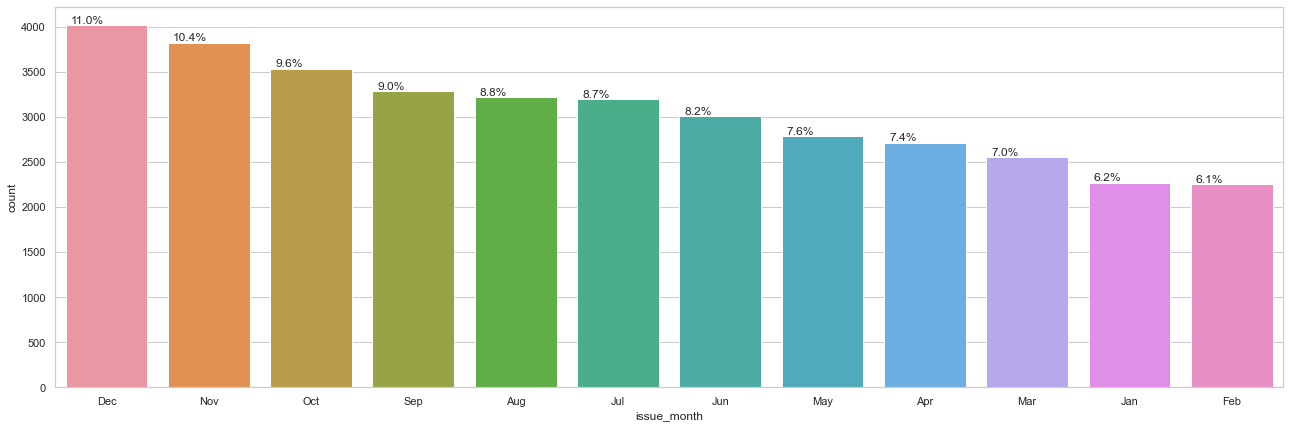

In [48]:
univaritePlot(df=loan,col='issue_month',vartype=1)

__Observation__: As we see most of the loan are comes in month of december.

__Variable Name__: __issue_year__

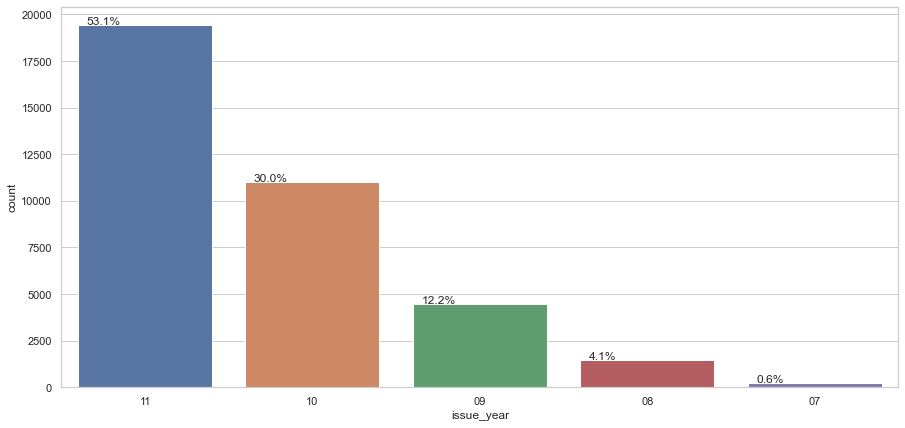

In [49]:
univaritePlot(df=loan,col='issue_year',vartype=1)

__Observation__: As increase the year the number of loan are also increases.